In [12]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [246]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sqlite3
import sqlalchemy
from collections import Counter
import itertools
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [247]:
# setting display options
pd.set_option('display.max_colwidth', 900, "display.max_columns", 30, "display.max_rows", 140)

In [248]:
df= pd.read_csv('SpidermanNoWayHomeNew.csv',encoding= 'latin-1', usecols=['id','date','content','hashtags','media'])

In [249]:
df['date'] = pd.to_datetime(df['date'])

In [250]:
df.head()

,id,date,content,hashtags,media
0,1.474890e+18,2021-12-25 23:59:24+00:00,#spiderman # gaming #spidermannowayhome\nhttps://t.co/5mCgEjX9vs,"['spiderman', 'spidermannowayhome']",NaN
1,1.474890e+18,2021-12-25 23:59:23+00:00,#SpiderManNoWayHome has officially hit $1B at the world box office in just 10 days! This also means that Tom Holland has starred in 5 movies that have reached this mark! https://t.co/eCSiJuOd4b,['SpiderManNoWayHome'],"[{'_type': 'snscrape.modules.twitter.Gif', 'thumbnailUrl': 'https://pbs.twimg.com/tweet_video_thumb/FHfe9kvWQAIcjpF.jpg', 'variants': [{'_type': 'snscrape.modules.twitter.VideoVariant', 'contentType': 'video/mp4', 'url': 'https://video.twimg.com/tweet_video/FHfe9kvWQAIcjpF.mp4', 'bitrate': 0}]}]"
2,1.474890e+18,2021-12-25 23:59:05+00:00,Just finished watching âSpider-Man: No Way Homeâ and all I can say is this:â¦ I f**king love this movie!!\n\n#SpiderManNoWayHome,['SpiderManNoWayHome'],NaN
3,1.474890e+18,2021-12-25 23:59:00+00:00,This week we have a spoiler filled discussion about #SpiderManNoWayHome and what were the things we liked and disliked about the movie and so much more\n\n#PodernFamily #PodNation #PodBreed #PodcastHQ\n\nhttps://t.co/rkX58JXfxM,"['SpiderManNoWayHome', 'PodernFamily', 'PodNation', 'PodBreed', 'PodcastHQ']",NaN
4,1.474890e+18,2021-12-25 23:58:41+00:00,Just saw #NoWayHome but in @IMAX with my family this Christmas.\n\nMe and my mom enjoyed it.\n\n#SpiderManNoWayHome https://t.co/AUyKeUSqgG,"['NoWayHome', 'SpiderManNoWayHome']","[{'_type': 'snscrape.modules.twitter.Photo', 'previewUrl': 'https://pbs.twimg.com/media/FHfeKsKWQAEkaUz?format=jpg&name=small', 'fullUrl': 'https://pbs.twimg.com/media/FHfeKsKWQAEkaUz?format=jpg&name=large'}, {'_type': 'snscrape.modules.twitter.Photo', 'previewUrl': 'https://pbs.twimg.com/media/FHfeKt0XMAkj0A9?format=jpg&name=small', 'fullUrl': 'https://pbs.twimg.com/media/FHfeKt0XMAkj0A9?format=jpg&name=large'}]"


In [251]:
df.describe()

,id
count,2.359000e+03
mean,1.474817e+18
std,4.595057e+13
min,1.474730e+18
25%,1.474780e+18
50%,1.474820e+18
75%,1.474860e+18
max,1.474890e+18


In [252]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   id        2359 non-null   float64            
 1   date      2359 non-null   datetime64[ns, UTC]
 2   content   2359 non-null   object             
 3   hashtags  2359 non-null   object             
 4   media     1080 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(3)
memory usage: 92.3+ KB


None

In [253]:
# prepare stopwords
stopwords = set(stopwords.words('english'))

#create the function of nlp to remove some characters
def nlp(content):
    corpus = []
    content = re.sub('\\n', ' ', content) # remove the newline code
    content = re.sub('http\S+', '', content) # remove url
    content = re.sub('#\w+', '', content) # remove hashtags
    content = re.sub('á','',content)
    content = re.sub('à','',content)
    content = re.sub('â','',content)
    content = re.sub('ï','',content)
    content = re.sub('ð','',content)
    content = re.sub('@[^\s]+', '', content) # remove @twitter_id
    content = content.split()
    corpus = [txt for txt in content if not txt in stopwords]
    return ' '.join(corpus)

In [254]:
df['text_nlp'] = df['content'].apply(lambda x: nlp(x))
df['text_nlp'].head(10)

0                                                                                                                                                                     # gaming
1                                                                      officially hit $1B world box office 10 days! This also means Tom Holland starred 5 movies reached mark!
2                                                                                      Just finished watching Spider-Man: No Way Home I say this:¦ I f**king love movie!!
3                                                                                                         This week spoiler filled discussion things liked disliked movie much
4                                                                                                                                Just saw family Christmas. Me mom enjoyed it.
5                                                                                                                            

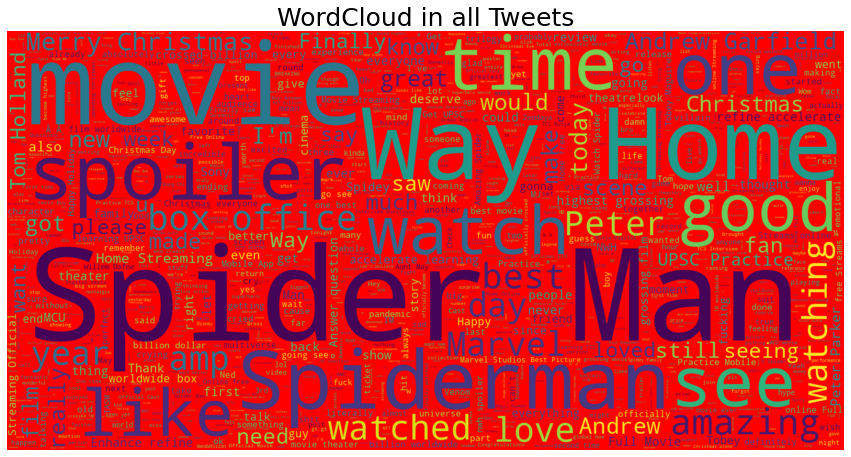

In [255]:
cloud = ' '.join([tweet for tweet in df['text_nlp']])
wc = WordCloud(background_color='red',max_words=2000, width=1600, \
               height=800, stopwords=stopwords).generate(cloud)

plt.figure(figsize=(15, 8))
plt.title('WordCloud in all Tweets', fontsize=25)
plt.axis('off')
plt.imshow(wc , interpolation = 'bilinear')
plt.show()

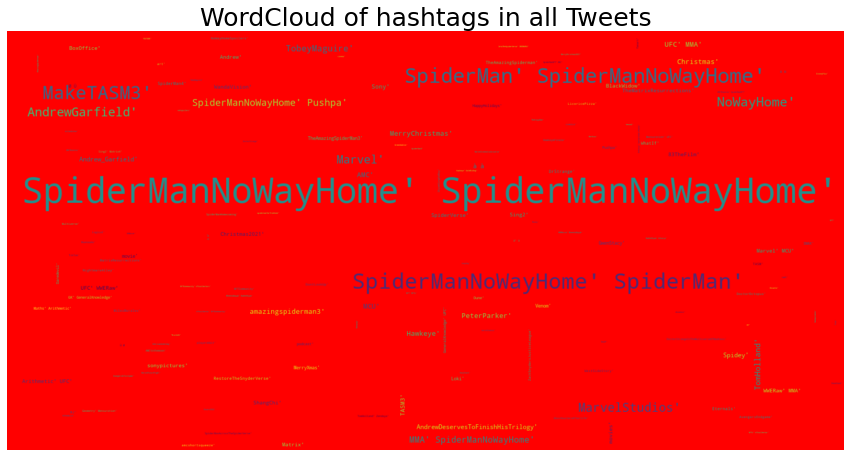

In [256]:
wordcloud2 = WordCloud(background_color='red',max_font_size =350,max_words=2000, width=1600, \
               height=800, stopwords=stopwords).generate(' '.join(df['hashtags']))
# Generate plot
plt.figure(figsize=(15, 8))
plt.title('WordCloud of hashtags in all Tweets', fontsize=25)
plt.axis('off')
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.show()

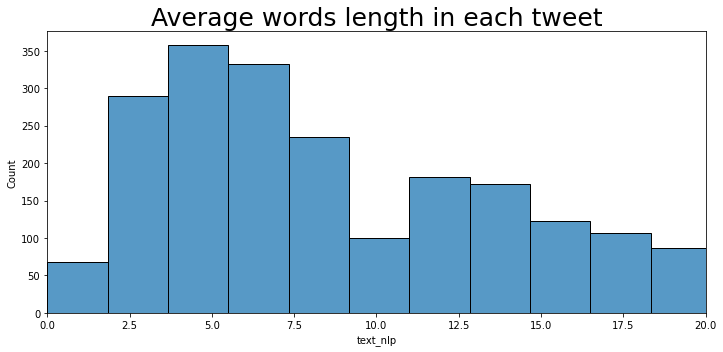

In [257]:
fig = plt.figure(figsize=(10,5))

word = df['text_nlp'].str.split().apply(lambda x: len(x))
sns.histplot(word.apply(lambda x: np.mean(x)), bins=30)
plt.title('Average words length in each tweet', fontsize=25)

plt.tight_layout()
plt.xlim([0, 20])
plt.show()

In [258]:
def polarity(content):
    testimonial = TextBlob(content)
    polarity = testimonial.sentiment.polarity
    return polarity


def subjectivity(content):
    testimonial = TextBlob(content)
    subjectivity = testimonial.subjectivity
    return subjectivity

In [259]:
def senti(content, polarity_threshold=0.0):
    testimonial = TextBlob(content)
    senti = testimonial.sentiment.polarity
    
    if senti > polarity_threshold:
        return 'Positive'
    elif np.abs(senti) == polarity_threshold:
        return 'Neutral'
    else:
        return 'Negative'
    

df['polarity'] = df['text_nlp'].apply(lambda x: polarity(x))
df['subjectivity'] = df['text_nlp'].apply(lambda x: subjectivity(x))
df['sentiment'] = df['text_nlp'].apply(lambda x: senti(x))

In [260]:
df.head()

,id,date,content,hashtags,media,text_nlp,polarity,subjectivity,sentiment
0,1.474890e+18,2021-12-25 23:59:24+00:00,#spiderman # gaming #spidermannowayhome\nhttps://t.co/5mCgEjX9vs,"['spiderman', 'spidermannowayhome']",NaN,# gaming,0.00000,0.000,Neutral
1,1.474890e+18,2021-12-25 23:59:23+00:00,#SpiderManNoWayHome has officially hit $1B at the world box office in just 10 days! This also means that Tom Holland has starred in 5 movies that have reached this mark! https://t.co/eCSiJuOd4b,['SpiderManNoWayHome'],"[{'_type': 'snscrape.modules.twitter.Gif', 'thumbnailUrl': 'https://pbs.twimg.com/tweet_video_thumb/FHfe9kvWQAIcjpF.jpg', 'variants': [{'_type': 'snscrape.modules.twitter.VideoVariant', 'contentType': 'video/mp4', 'url': 'https://video.twimg.com/tweet_video/FHfe9kvWQAIcjpF.mp4', 'bitrate': 0}]}]",officially hit $1B world box office 10 days! This also means Tom Holland starred 5 movies reached mark!,0.00000,0.000,Neutral
2,1.474890e+18,2021-12-25 23:59:05+00:00,Just finished watching âSpider-Man: No Way Homeâ and all I can say is this:â¦ I f**king love this movie!!\n\n#SpiderManNoWayHome,['SpiderManNoWayHome'],NaN,Just finished watching Spider-Man: No Way Home I say this:¦ I f**king love movie!!,0.78125,0.600,Positive
3,1.474890e+18,2021-12-25 23:59:00+00:00,This week we have a spoiler filled discussion about #SpiderManNoWayHome and what were the things we liked and disliked about the movie and so much more\n\n#PodernFamily #PodNation #PodBreed #PodcastHQ\n\nhttps://t.co/rkX58JXfxM,"['SpiderManNoWayHome', 'PodernFamily', 'PodNation', 'PodBreed', 'PodcastHQ']",NaN,This week spoiler filled discussion things liked disliked movie much,0.25000,0.625,Positive
4,1.474890e+18,2021-12-25 23:58:41+00:00,Just saw #NoWayHome but in @IMAX with my family this Christmas.\n\nMe and my mom enjoyed it.\n\n#SpiderManNoWayHome https://t.co/AUyKeUSqgG,"['NoWayHome', 'SpiderManNoWayHome']","[{'_type': 'snscrape.modules.twitter.Photo', 'previewUrl': 'https://pbs.twimg.com/media/FHfeKsKWQAEkaUz?format=jpg&name=small', 'fullUrl': 'https://pbs.twimg.com/media/FHfeKsKWQAEkaUz?format=jpg&name=large'}, {'_type': 'snscrape.modules.twitter.Photo', 'previewUrl': 'https://pbs.twimg.com/media/FHfeKt0XMAkj0A9?format=jpg&name=small', 'fullUrl': 'https://pbs.twimg.com/media/FHfeKt0XMAkj0A9?format=jpg&name=large'}]",Just saw family Christmas. Me mom enjoyed it.,0.50000,0.700,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

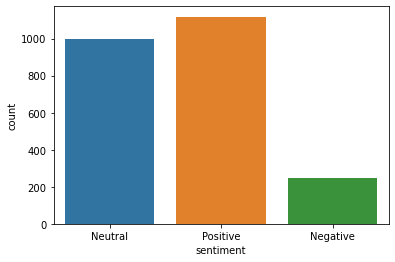

In [261]:
sns.countplot(x='sentiment', data=df)

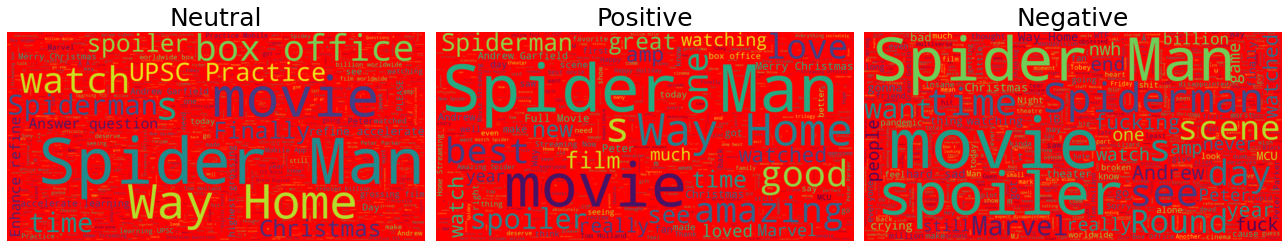

In [262]:
fig, ax = plt.subplots(1, 3, figsize=(18, 8))
sentiments = df['sentiment'].unique()

for i, senti in enumerate(sentiments):
    senti_df = df.query('sentiment==@senti')
    cloud = ' '.join([tweet for tweet in senti_df['text_nlp']])
    wordcloud3 = WordCloud(background_color='red',max_words=2000, width=1600, \
                   height=800).generate(cloud)

    ax[i].set_title(senti, fontsize=25)
    ax[i].axis('off')
    ax[i].imshow(wordcloud3 , interpolation = 'bilinear')
    
plt.tight_layout()
plt.show()

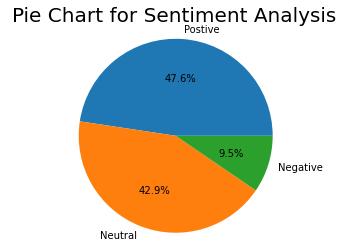

In [263]:
# if using a Jupyter notebook, include:
%matplotlib inline

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Postive','Neutral','Negative']
sizes = [50, 45, 10]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Pie Chart for Sentiment Analysis',fontsize=20)


plt.show()


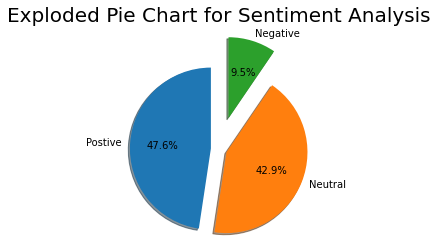

In [264]:
explode = (0.1, 0.1, 0.4)

fig, ax = plt.subplots()
ax.pie(sizes,
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Exploded Pie Chart for Sentiment Analysis',fontsize=20)


plt.show()